# Project goal

 in this analysist we will studdy the 2 pre-paid programs and the customer behavior and try to determind on what program to put more time and money for enlarging the revnaue. we will start with openning the datasets and checking issues on them like missing values or duplicates. then we will marge tables to one that it will be easiwer ti analyze. then we will studdy them and visual them and we will check our hypothesis and make our conclusions. good louck to us.

#stage 1# 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from functools import reduce
from scipy import stats as st

In [3]:
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')


we imported liberies that we can work and downloaded datasets of the project. now  we check the datasets are here to read and work.

#stage 2#

In [4]:
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [5]:
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


now we will learn and work on every table separately

## table 1 - plans

In [9]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [11]:
df_plans.isnull()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False


this firsrt table of plans looks fine and clean

## table 2- users

In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


we see a lot of missing entries in churn_date and that churn_date and reg_date are objects insted of dates

In [13]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [14]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

from looking and learnning the tables data we can see a few issus. the churn_date has 466 out of 500 nan's. reg_date and churn_date are objects and need to be changed to date.

In [15]:
df_users.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [16]:
df_users['first_name']= df_users['first_name'].str.lower()
df_users['last_name'] = df_users['last_name'].str.lower()
df_users['city'] = df_users['city'].str.lower()
df_users['plan'] = df_users['plan'].str.lower()

In [17]:
df_users.duplicated().sum()

0

we see that there are no duplication issues

In [18]:
display(df_users.head(25))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaN
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaN
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaN
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaN
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaN
5,1005,livia,shields,31,"dallas-fort worth-arlington, tx msa",2018-11-29,surf,NaN
6,1006,jesusa,bradford,73,"san francisco-oakland-berkeley, ca msa",2018-11-27,ultimate,2018-12-18
7,1007,eusebio,welch,42,"grand rapids-kentwood, mi msa",2018-07-11,surf,NaN
8,1008,emely,hoffman,53,"orlando-kissimmee-sanford, fl msa",2018-08-03,ultimate,NaN
9,1009,gerry,little,19,"san jose-sunnyvale-santa clara, ca msa",2018-04-22,surf,NaN


In [19]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [20]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [21]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


we change the object type to date and check in info that it worked

In [22]:
df_users['reg_date'].min()

Timestamp('2018-01-01 00:00:00')

In [23]:
df_users['reg_date'].max()

Timestamp('2018-12-31 00:00:00')

we checkd the min and max dates on the data for later on adding a month column so we made sure we are in one year and not more because then we will have truble withe duplicated month since we get them 1-12

In [24]:
df_users['churn_date'].min()

Timestamp('2018-07-31 00:00:00')

In [25]:
df_users['churn_date'].max()

Timestamp('2018-12-31 00:00:00')

we did the same checking for the last date that the client is in the program

In [26]:
df_users['churn_date'].fillna('2018-12-31')

0      2018-12-31
1      2018-12-31
2      2018-12-31
3      2018-12-31
4      2018-12-31
          ...    
495    2018-12-31
496    2018-12-31
497    2018-12-31
498    2018-12-31
499    2018-12-31
Name: churn_date, Length: 500, dtype: object

In [27]:
df_users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

we had a lot of nan's in the churn column and we know that if it is a nan very much could be that it meens that the client is stil in the program so we filled it in with the last day of the year 

i still think it is better to change then having nans but i will take it in mind

In [28]:
df_users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

checkig distribution of plans.here we can see that users prefer the surf plan a lot more then ultimate

now the table looks good and readable that we can use it for our studdy

## table 3- calls

In [29]:
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [30]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


the data looks o.k. except of call_date that is again a object insted of date

In [31]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [32]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [33]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


and we change the date to date type

In [34]:
df_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

the user_id type is int and its a number but we can also approach it as an object because it is an user identity. for now i decide to keep it as int.

In [35]:
df_calls['duration'].value_counts()

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64

In [36]:
df_calls['duration'].value_counts() / df_calls.shape[0]* 100

0.00     19.482339
8.37      0.074055
4.02      0.074055
3.91      0.073329
7.61      0.072603
           ...    
25.53     0.000726
29.34     0.000726
26.05     0.000726
36.24     0.000726
27.16     0.000726
Name: duration, Length: 2802, dtype: float64

we see that there are about 20% of 0 seconds. that may be a arithmetic problem but it's a lot of rows and it may be importent data. in describe of project it was mantioned that it could be miss-calls

In [37]:
df_calls['call_date'].min()

Timestamp('2018-01-15 00:00:00')

In [38]:
df_calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

like in the users table we check the dates that they are not over a year

In [39]:
df_calls['month']= df_calls['call_date'].dt.month

In [40]:
def duration_to_min_charge(cell):
    x=cell
    return math.ceil(x)

df_calls['min_charge']=df_calls['duration'].apply(duration_to_min_charge)

In [41]:
display(df_calls.head())

,id,user_id,call_date,duration,month,min_charge
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


we added a column for the month

##table 4 - messages

In [42]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


we see that the data is pretty o.k. except of the object/date issue

In [43]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [44]:
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [45]:
print(df_messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


In [46]:
df_messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

the data looks fine and fulled up

In [47]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

In [48]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


changing datatype to date

In [49]:
df_messages['message_date'].min()

Timestamp('2018-01-15 00:00:00')

In [50]:
df_messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

like in the above tables we check the dates that they are not over a year

In [51]:
df_messages['month'] = df_messages['message_date'].dt.month

In [52]:
display(df_messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


the table looks set to work with the added month column

##table 5- internet

In [53]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


also here the table looks fine except from dates that become objects

In [54]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [55]:
df_internet.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
104820    False
104821    False
104822    False
104823    False
104824    False
Length: 104825, dtype: bool

In [56]:
df_internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [57]:
print(df_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


In [58]:
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


the table looks clean and o.k.

In [59]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [60]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


and now it looks better after we fixed datatype to date

In [61]:
df_internet['mb_used'].value_counts()

0.00      13747
414.46        8
435.77        8
417.46        7
313.79        7
          ...  
638.12        1
217.39        1
683.90        1
243.97        1
563.11        1
Name: mb_used, Length: 57624, dtype: int64

In [62]:
df_internet['mb_used'].value_counts() / df_internet.shape[0]*100

0.00      13.114238
414.46     0.007632
435.77     0.007632
417.46     0.006678
313.79     0.006678
            ...    
638.12     0.000954
217.39     0.000954
683.90     0.000954
243.97     0.000954
563.11     0.000954
Name: mb_used, Length: 57624, dtype: float64

we see a lot of 0 but that can mean that a user didnt use his internet program. for now i decide not to change the values

now all tables look fixed and usefull. now lets get started trying joining them to one.

In [63]:
df_internet['session_date'].min()

Timestamp('2018-01-15 00:00:00')

In [64]:
df_internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

and again just checking we are in one year

In [65]:
df_internet['month']= df_internet['session_date'].dt.month

In [66]:
display(df_internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [67]:
display(df_calls.head())

,id,user_id,call_date,duration,month,min_charge
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


we added a month column

now we are stating to join  all are tables to on data source that it will be a lot easyer to analyze

In [68]:
total_calls = df_calls.pivot_table(index=['user_id', 'month'], values='min_charge', aggfunc='sum')

In [69]:
total_calls.head()

min_charge
user_id month            
1000    12            124
1001    8             182
        9             315
        10            393
        11            426

we made a table we all the monthly minutes are sumed up

In [70]:
display(df_messages.head())

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [71]:
total_msg =  df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')

In [72]:
total_msg.rename(columns = {'id':'num_msg'}, inplace = True)

In [73]:
display(total_msg.head())

num_msg
user_id month         
1000    12          11
1001    8           30
        9           44
        10          53
        11          36

In [74]:
display(df_internet.head())

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


we made a table with the number of all messages per user per month

In [75]:
total_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].sum()

In [76]:
display(total_internet.head())

user_id  month
1000     12        1901.47
1001     8         6919.15
         9        13314.82
         10       22330.49
         11       18504.30
Name: mb_used, dtype: float64

In [77]:
total_info = total_calls.merge(total_msg, on=['user_id','month'], how='outer').fillna(0)

In [78]:
total_info1 = total_info.merge(total_internet, on=['user_id','month'], how='outer').fillna(0)

In [79]:
display(total_info1.head())

min_charge  num_msg   mb_used
user_id month                               
1000    12          124.0     11.0   1901.47
1001    8           182.0     30.0   6919.15
        9           315.0     44.0  13314.82
        10          393.0     53.0  22330.49
        11          426.0     36.0  18504.30

we made a table with all the mb used for every user per month

In [80]:
print(len(total_info1))

2293


In [81]:
total_info1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2293 entries, (1000, 12) to (1311, 6)
Data columns (total 3 columns):
min_charge    2293 non-null float64
num_msg       2293 non-null float64
mb_used       2293 non-null float64
dtypes: float64(3)
memory usage: 64.5 KB


In [82]:
df_to_merge = [total_calls, total_msg, total_internet]
total = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), df_to_merge )

In [83]:
total.head()

min_charge  num_msg   mb_used
user_id month                               
1000    12          124.0     11.0   1901.47
1001    8           182.0     30.0   6919.15
        9           315.0     44.0  13314.82
        10          393.0     53.0  22330.49
        11          426.0     36.0  18504.30

and checking that it works

now we will create a dataframe with all monthly charges oer user

In [84]:

list_user_id= df_users['user_id'].to_list()
rows_ind_month=[]
for x in list_user_id:
    for i in range(12):
        rows_ind_month.append([x,i+1])

charge_to_month=pd.DataFrame(rows_ind_month, columns=['user_id', 'month'])
charge_to_month=pd.merge(charge_to_month,df_users[['user_id','reg_date']],on='user_id', how='left')
charge_to_month['valid_m']=charge_to_month['month']>=charge_to_month['reg_date'].dt.month 
charge_to_month=charge_to_month.query('valid_m==True')

In [85]:
charge_to_month.head()

,user_id,month,reg_date,valid_m
11,1000,12,2018-12-24,True
19,1001,8,2018-08-13,True
20,1001,9,2018-08-13,True
21,1001,10,2018-08-13,True
22,1001,11,2018-08-13,True


In [86]:
charge_to_month = charge_to_month[['user_id', 'month']]

In [87]:
charge_to_month.head()

,user_id,month
11,1000,12
19,1001,8
20,1001,9
21,1001,10
22,1001,11


In [88]:
charge_to_month = pd.merge(charge_to_month, df_users[['user_id', 'city', 'plan']], on='user_id', how='left')

In [89]:
charge_to_month.head()

,user_id,month,city,plan
0,1000,12,"atlanta-sandy springs-roswell, ga msa",ultimate
1,1001,8,"seattle-tacoma-bellevue, wa msa",surf
2,1001,9,"seattle-tacoma-bellevue, wa msa",surf
3,1001,10,"seattle-tacoma-bellevue, wa msa",surf
4,1001,11,"seattle-tacoma-bellevue, wa msa",surf


In [90]:
charge_to_month = pd.merge(charge_to_month, total, on=['user_id', 'month'], how='left')

In [91]:
charge_to_month.head()

,user_id,month,city,plan,min_charge,num_msg,mb_used
0,1000,12,"atlanta-sandy springs-roswell, ga msa",ultimate,124.0,11.0,1901.47
1,1001,8,"seattle-tacoma-bellevue, wa msa",surf,182.0,30.0,6919.15
2,1001,9,"seattle-tacoma-bellevue, wa msa",surf,315.0,44.0,13314.82
3,1001,10,"seattle-tacoma-bellevue, wa msa",surf,393.0,53.0,22330.49
4,1001,11,"seattle-tacoma-bellevue, wa msa",surf,426.0,36.0,18504.30


In [92]:
df_plans.rename(columns = {'plan_name':'plan'}, inplace = True)

In [93]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [94]:
charge_to_month = pd.merge(charge_to_month, df_plans, on=['plan'], how='left')

In [95]:
charge_to_month.head()

,user_id,month,city,plan,min_charge,num_msg,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,"atlanta-sandy springs-roswell, ga msa",ultimate,124.0,11.0,1901.47,1000,30720,3000,70,7,0.01,0.01
1,1001,8,"seattle-tacoma-bellevue, wa msa",surf,182.0,30.0,6919.15,50,15360,500,20,10,0.03,0.03
2,1001,9,"seattle-tacoma-bellevue, wa msa",surf,315.0,44.0,13314.82,50,15360,500,20,10,0.03,0.03
3,1001,10,"seattle-tacoma-bellevue, wa msa",surf,393.0,53.0,22330.49,50,15360,500,20,10,0.03,0.03
4,1001,11,"seattle-tacoma-bellevue, wa msa",surf,426.0,36.0,18504.30,50,15360,500,20,10,0.03,0.03


now we are adding a very important column of the totoal payment a user pay by is plan and over using

In [96]:
def user_month_chrage(row):
    min_u=row['min_charge']
    mes_u=row['num_msg']
    mb_u=row['mb_used']
    
    min_limit = row['minutes_included']
    message_limit = row['messages_included']
    mb_limit = row['mb_per_month_included']
    monthly_rate = row['usd_monthly_pay']
    over_min_rate =  row['usd_per_minute']
    over_message_rate = row['usd_per_message']
    over_gb_rate = row['usd_per_gb']
    
    if min_u<=min_limit:
        over_min=0
    else:
        over_min=min_u-min_limit
    if mes_u<=message_limit:
        over_message=0
    else:
        over_message=mes_u-message_limit
    if mb_u<=mb_limit:
        over_mb=0
    else:
        over_mb= mb_u-mb_limit
    over_gb= np.ceil(over_mb/1024)
    total_charge= monthly_rate+over_min*over_min_rate+over_message*over_message_rate+over_gb*over_gb_rate
    return total_charge

In [98]:
charge_to_month.head()

,user_id,month,city,plan,min_charge,num_msg,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_pay
0,1000,12,"atlanta-sandy springs-roswell, ga msa",ultimate,124.0,11.0,1901.47,1000,30720,3000,70,7,0.01,0.01,70.00
1,1001,8,"seattle-tacoma-bellevue, wa msa",surf,182.0,30.0,6919.15,50,15360,500,20,10,0.03,0.03,20.00
2,1001,9,"seattle-tacoma-bellevue, wa msa",surf,315.0,44.0,13314.82,50,15360,500,20,10,0.03,0.03,20.00
3,1001,10,"seattle-tacoma-bellevue, wa msa",surf,393.0,53.0,22330.49,50,15360,500,20,10,0.03,0.03,90.09
4,1001,11,"seattle-tacoma-bellevue, wa msa",surf,426.0,36.0,18504.30,50,15360,500,20,10,0.03,0.03,60.00


we are adding another column of how mouch the phone company gets extra over the plans

In [99]:
charge_to_month['ravenue'] = charge_to_month['total_pay'] - charge_to_month['usd_monthly_pay']
charge_to_month.head()

,user_id,month,city,plan,min_charge,num_msg,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_pay,ravenue
0,1000,12,"atlanta-sandy springs-roswell, ga msa",ultimate,124.0,11.0,1901.47,1000,30720,3000,70,7,0.01,0.01,70.00,0.00
1,1001,8,"seattle-tacoma-bellevue, wa msa",surf,182.0,30.0,6919.15,50,15360,500,20,10,0.03,0.03,20.00,0.00
2,1001,9,"seattle-tacoma-bellevue, wa msa",surf,315.0,44.0,13314.82,50,15360,500,20,10,0.03,0.03,20.00,0.00
3,1001,10,"seattle-tacoma-bellevue, wa msa",surf,393.0,53.0,22330.49,50,15360,500,20,10,0.03,0.03,90.09,70.09
4,1001,11,"seattle-tacoma-bellevue, wa msa",surf,426.0,36.0,18504.30,50,15360,500,20,10,0.03,0.03,60.00,40.00


#step 3 - analyzing the data

In [100]:
charge_to_month.describe()

,user_id,month,min_charge,num_msg,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,total_pay,ravenue
count,3355.000000,3355.000000,2258.000000,1806.000000,2277.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,1759.000000,1759.000000
mean,1250.669747,8.265872,435.937555,42.110188,16882.197501,358.077496,20341.126677,1310.730253,36.214605,9.027124,0.023514,0.023514,64.310796,27.852581
std,143.314240,2.944672,231.972343,33.122931,7869.784848,444.770548,7191.237499,1170.448812,23.408976,1.404539,0.009364,0.009364,44.692362,47.836418
min,1000.000000,1.000000,0.000000,1.000000,92.310000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,20.000000,0.000000
25%,1125.500000,6.000000,275.000000,17.000000,12347.720000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,25.595000,0.000000
50%,1249.000000,9.000000,429.000000,34.000000,16873.740000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,70.000000,0.600000
75%,1376.000000,11.000000,574.750000,59.000000,21041.520000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,70.000000,40.000000
max,1499.000000,12.000000,1510.000000,266.000000,70931.590000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,590.370000,570.370000


here we can see the mean and std for the over all data, we see that the mean of calls is higer then as given in plans and the internet is high but the messages mean is low the the surf (lower and smaller) plan. we can also see that the std is not really close to the mean but reaces far out

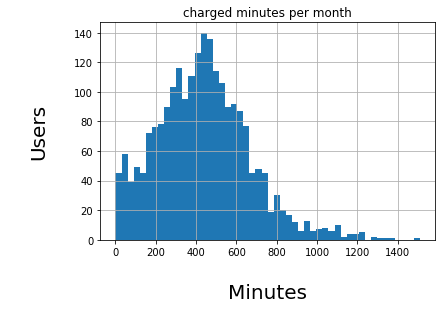

In [157]:
charge_to_month['min_charge'].hist(bins=50).set_title('charged minutes per month')
plt.xlabel('\nMinutes\n', fontsize = 20)
plt.ylabel('\nUsers\n', fontsize = 20)
plt.show()

from looking at the hist we can see that even with both plans the main calls use is in between 200-600 that is around the lower plans(surf) limit (500)

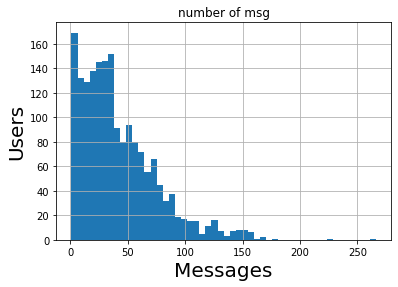

In [156]:
charge_to_month['num_msg'].hist(bins=50).set_title('number of msg')
plt.xlabel('Messages', fontsize = 20)
plt.ylabel('Users', fontsize = 20)
plt.show()

text messages is so out, we see that must users dont get to 45 msg in a month. i wonder how much whatsapp's they get

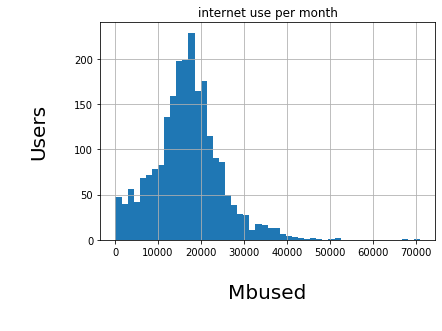

In [158]:
charge_to_month['mb_used'].hist(bins=50, label="internet use").set_title('internet use per month')
plt.xlabel('\nMbused\n', fontsize = 20)
plt.ylabel('\nUsers\n', fontsize = 20)
plt.show()

users use there internet on there phone but it looks like in plans limits

we are going to create 2 slices of the data by plans

In [104]:
ctm_ultimate = charge_to_month.query('plan=="ultimate"')
ctm_surf = charge_to_month.query('plan=="surf"')

In [105]:
ctm_ultimate['ravenue'] = ctm_ultimate['ravenue'].fillna(0)
ctm_surf['ravenue']=ctm_surf['ravenue'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
ctm_ultimate['total_pay'] = ctm_ultimate['total_pay'].fillna(0)
ctm_surf['total_pay']=ctm_surf['total_pay'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---mb_used---
(count     2277.000000
mean     16882.197501
std       7869.784848
min         92.310000
25%      12347.720000
50%      16873.740000
75%      21041.520000
max      70931.590000
Name: mb_used, dtype: float64, 2)


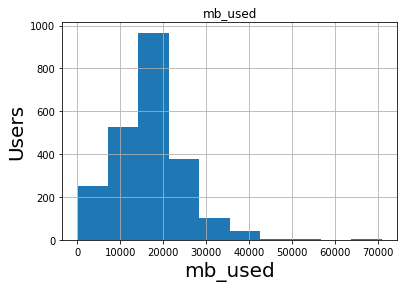

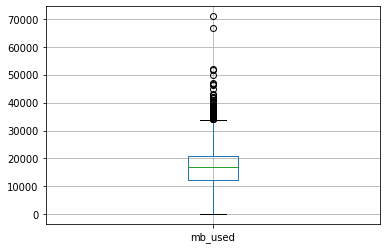

---num_msg---
(count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: num_msg, dtype: float64, 2)


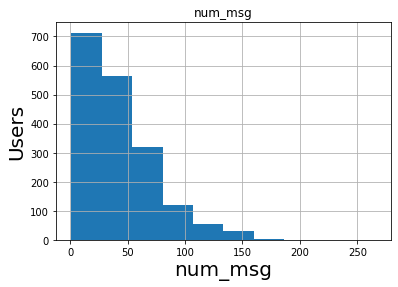

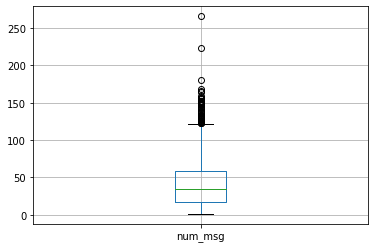

---min_charge---
(count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: min_charge, dtype: float64, 2)


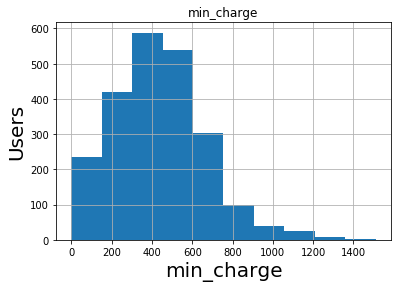

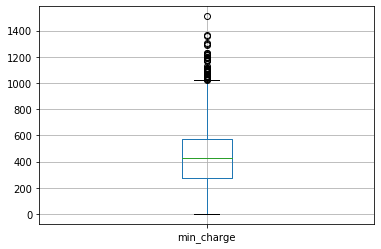

---total_pay---
(count    1759.000000
mean       64.310796
std        44.692362
min        20.000000
25%        25.595000
50%        70.000000
75%        70.000000
max       590.370000
Name: total_pay, dtype: float64, 2)


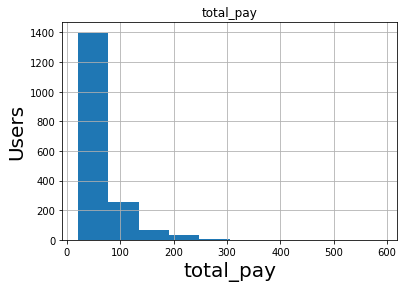

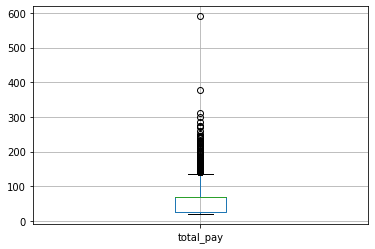

In [160]:
studdy_par= ['mb_used', 'num_msg', 'min_charge', 'total_pay']
for cor in studdy_par:
    print('---{}---'.format(cor))
    print((charge_to_month[cor].describe(), 2))
    charge_to_month.hist(cor)
    plt.xlabel(cor, fontsize = 20)
    plt.ylabel('Users', fontsize = 20)
    plt.show()
    charge_to_month.boxplot(cor)
    plt.show()

this was an all users data hist and boxplos, now let see it by plans

---mb_used---
(count      719.000000
mean     17238.642253
std       7831.018323
min        233.170000
25%      12671.130000
50%      16863.450000
75%      21025.155000
max      46595.330000
Name: mb_used, dtype: float64, 2)


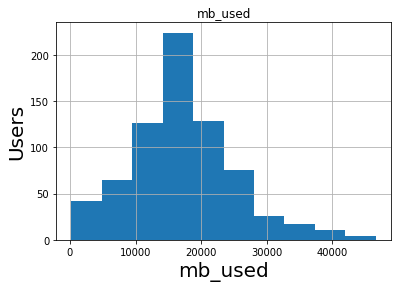

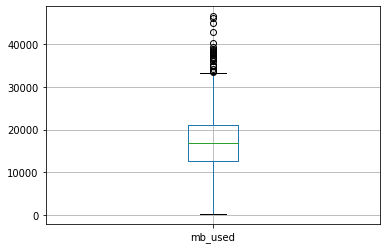

---num_msg---
(count    584.000000
mean      46.296233
std       32.942118
min        1.000000
25%       21.000000
50%       41.000000
75%       66.000000
max      166.000000
Name: num_msg, dtype: float64, 2)


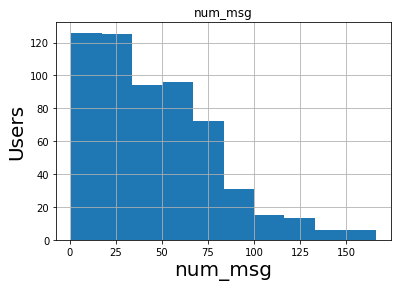

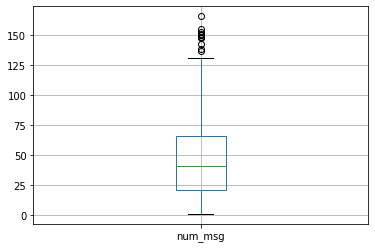

---min_charge---
(count     713.000000
mean      434.676017
std       237.852123
min         0.000000
25%       263.000000
50%       425.000000
75%       566.000000
max      1369.000000
Name: min_charge, dtype: float64, 2)


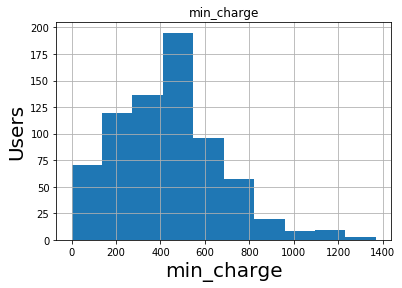

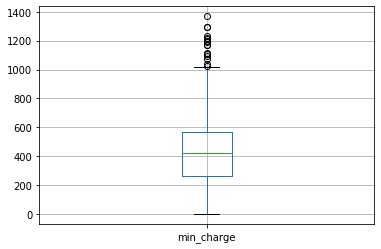

---total_pay---
(count    1088.000000
mean       38.448529
std        36.952755
min         0.000000
25%         0.000000
50%        70.000000
75%        70.000000
max       182.000000
Name: total_pay, dtype: float64, 2)


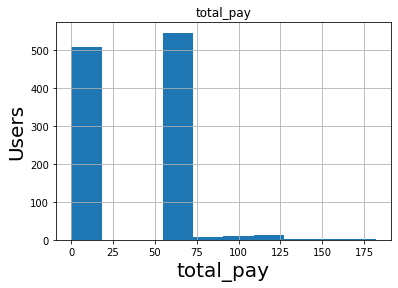

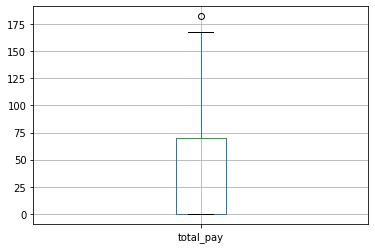

In [159]:
studdy_par= ['mb_used', 'num_msg', 'min_charge', 'total_pay']
for cor in studdy_par:
    print('---{}---'.format(cor))
    print((ctm_ultimate[cor].describe(), 2))
    ctm_ultimate.hist(cor)
    plt.xlabel(cor, fontsize = 20)
    plt.ylabel('Users', fontsize = 20)
    plt.show()
    ctm_ultimate.boxplot(cor)
    plt.show()

here we saw the ultimate plan distrbution. inn the internet use we see that the mean is very low, almost half of the plans size(30000). most of the users don't use half of the plan and the pik is in the middle of the mb size to plan. also in the message data we see that pepole stoped useing text messages adג communicate by other ways and platforms so we can see that the number of messages us preaty low. the pick of the calls is around 500 calls that goes with the surf plan. in total pay we see a few users that pay a very big amount of money but most users dont over there plan limit and stay in it. 

---mb_used---
(count     1558.000000
mean     16717.702137
std       7884.682983
min         92.310000
25%      12187.955000
50%      16923.830000
75%      21039.860000
max      70931.590000
Name: mb_used, dtype: float64, 2)


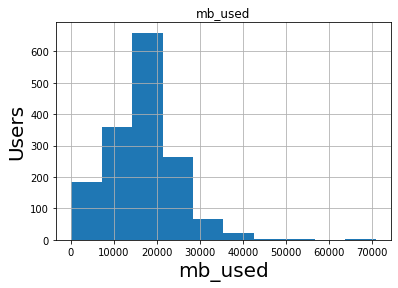

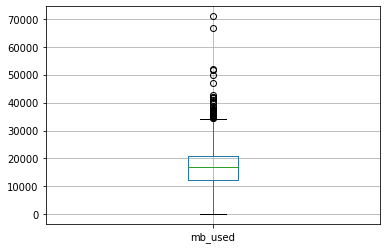

---num_msg---
(count    1222.000000
mean       40.109656
std        33.035500
min         1.000000
25%        16.000000
50%        32.000000
75%        54.000000
max       266.000000
Name: num_msg, dtype: float64, 2)


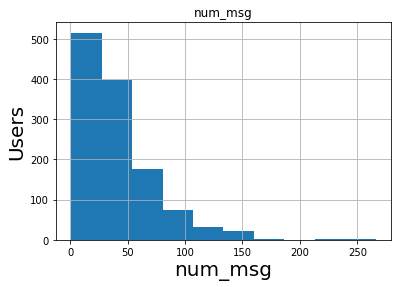

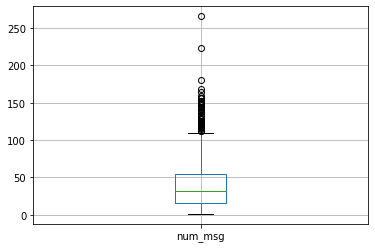

---min_charge---
(count    1545.000000
mean      436.519741
std       229.283805
min         0.000000
25%       279.000000
50%       430.000000
75%       579.000000
max      1510.000000
Name: min_charge, dtype: float64, 2)


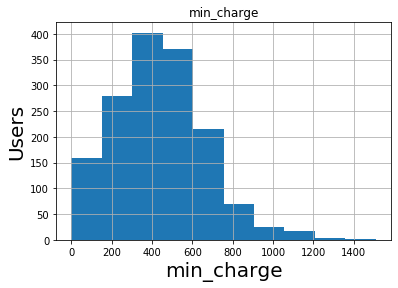

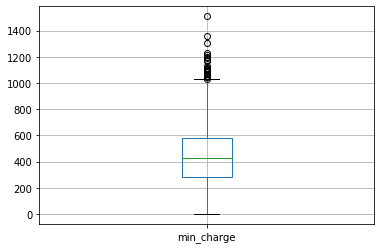

---total_pay---
(count    2267.000000
mean       31.447150
std        49.050468
min         0.000000
25%         0.000000
50%        20.000000
75%        43.570000
max       590.370000
Name: total_pay, dtype: float64, 2)


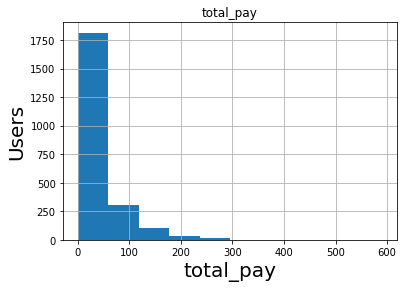

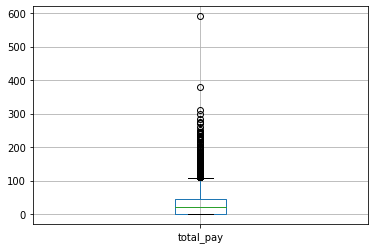

In [161]:
studdy_par= ['mb_used', 'num_msg', 'min_charge', 'total_pay']
for cor in studdy_par:
    print('---{}---'.format(cor))
    print((ctm_surf[cor].describe(), 2))
    ctm_surf.hist(cor)
    plt.xlabel(cor, fontsize = 20)
    plt.ylabel('Users', fontsize = 20)
    plt.show()
    ctm_surf.boxplot(cor)
    plt.show()

 after we look at the surf plan distribution we can say about it the following:
 the users on internet use it a lot more than there are limited in there plan. the mean of mb is bigger than the limit is. on the message data we see that it is not sow high like in the ultimate plan but we still see that not a few users go over there limit. 50% of users call over there limit call plan and one of them got it 3 times more than the plan(1510/500). in total pay we see that a plan that cost 20$ users pay 2 or 3 times more(the middle of users (50%) pay 40 and the top 25% pay 80$ and goes up to 590$) a month that is so mouch more then the basic plan and means that there is a lot of money there.

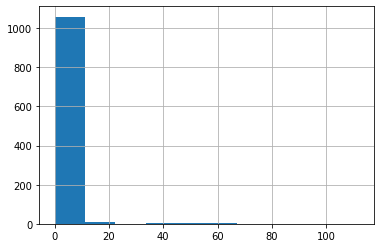

In [109]:
ctm_ultimate['ravenue'].hist()
plt.show()

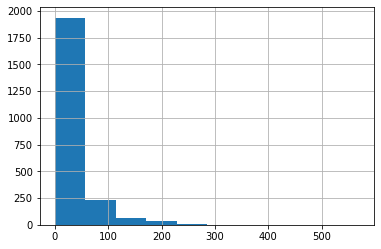

In [110]:
ctm_surf['ravenue'].hist()
plt.show()

from comparing the amount of money that the company gets over the pay for the basic plan we see that in the ultimate plan they dont get mouch maybe 10 dollars more for a month user not every month and on the other side we see that almost all the surf plan users pay twice of the basic payment and most of them pay a lot more. 

#step 4 - checking the hypotheses

# hypothesis 1- same ravenue

now lets check our 2 hypotheses. the first one is that there is a diffrence in the ravenue between the 2 plans. 
H0= there is no diffrence of ravenue between the 2 plans
H1= there is a diffrence between them
our alpha will be 0.03 because even if it is small its a diffrence we can feel

the criterion we use for checking the hypothesis is the incoming money over the plans basic payment(i called it ravenue), in other words the profit of the company because at the end of our studdy we need to talk busines and profit is what means 

In [111]:
alpha = 0.03 

results = st.ttest_ind(ctm_surf['ravenue'], ctm_ultimate['ravenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.5318366755108466e-48
We reject the null hypothesis


In [125]:
alpha = 0.03 

results = st.ttest_ind(ctm_surf['total_pay'], ctm_ultimate['total_pay'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  3.0714120740830146e-05
We reject the null hypothesis


from the calculation of statics we see that the null hypthesis is very small so we reject the hypothesis that the ultimate and surf plans are the same and that meets up with the observing of data above that there is a diffrence between the plans

# hypothesis 2-NY area

now lets check our second hypothes. we think that there is a diffrence on the ravenue on the NY-NJ area to all other states
H0= there is no diffrence between the NY-NJ area to all other areas
H1= there is a diffrence between the NY-NJ area to all others
our alpha will be 0.1 because 10% is a diffrence that is not an incident but a real diffrence 

the criterion we use for checking the hypothesis is the incoming money over the plans basic payment(i called it ravenue), in other words the profit of the company because at the end of our studdy we need to talk busines and profit is what means 

In [113]:
charge_to_month_ny=charge_to_month.query('city == "new york-newark-jersey city, ny-nj-pa msa"')
ctm_other = charge_to_month.query('city != "new york-newark-jersey city, ny-nj-pa msa"')

In [114]:
charge_to_month_ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 83 to 3346
Data columns (total 16 columns):
user_id                  552 non-null int64
month                    552 non-null int64
city                     552 non-null object
plan                     552 non-null object
min_charge               371 non-null float64
num_msg                  285 non-null float64
mb_used                  376 non-null float64
messages_included        552 non-null int64
mb_per_month_included    552 non-null int64
minutes_included         552 non-null int64
usd_monthly_pay          552 non-null int64
usd_per_gb               552 non-null int64
usd_per_message          552 non-null float64
usd_per_minute           552 non-null float64
total_pay                279 non-null float64
ravenue                  279 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 73.3+ KB


In [115]:
charge_to_month_ny.isnull().sum()

user_id                    0
month                      0
city                       0
plan                       0
min_charge               181
num_msg                  267
mb_used                  176
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
total_pay                273
ravenue                  273
dtype: int64

In [116]:
charge_to_month_ny['ravenue']=charge_to_month_ny['ravenue'].fillna(0.1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
ctm_other['ravenue'].isnull().sum()

1323

In [145]:
ctm_other['ravenue']=ctm_other['ravenue'].dropna()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
ctm_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2803 entries, 0 to 3354
Data columns (total 16 columns):
user_id                  2803 non-null int64
month                    2803 non-null int64
city                     2803 non-null object
plan                     2803 non-null object
min_charge               1887 non-null float64
num_msg                  1521 non-null float64
mb_used                  1901 non-null float64
messages_included        2803 non-null int64
mb_per_month_included    2803 non-null int64
minutes_included         2803 non-null int64
usd_monthly_pay          2803 non-null int64
usd_per_gb               2803 non-null int64
usd_per_message          2803 non-null float64
usd_per_minute           2803 non-null float64
total_pay                1480 non-null float64
ravenue                  2803 non-null float64
dtypes: float64(7), int64(7), object(2)
memory usage: 372.3+ KB


we had Nan's in the df we made for NY and others so we droped  them up for the caculation 

In [147]:
alpha = 0.1 

results = st.ttest_ind(ctm_other['ravenue'], charge_to_month_ny['ravenue'])

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.5312127215893525
We can't reject the null hypothesis


from the answer we got we see that there is not a big diffrence between the NY-NJ area to all other area in the USA so we dont need to focus only there but pay the same attention to all of the US.

#step 5- overall conclusion 

so what did we do here?
##step 1##
first thing we imported our liberis and tools to work with and imported our data sets

##step 2##
we read our data sets and found a few issues. we changed dates that where in object type to date and time type.
we saw Nans and decided to cange then in to dates
we added columns of month and made new df with monthly sums of calls, messages and mb
after we had our clean df we merged them together and added the pay per month and profit columns

##step 3##
we analyzed the data and visualized it. we found the mean and std and studdyed the distribution of it.
we learned the behavior of users and the diffrences between the 2 plans

##step 4##
we cheked our 2 hypothesis and found out statistical answer


#conclusion 

after studdying our dataset this is what we found out:
we knew that there where 2 plans, one was a basic and small plan with a small amount of calls, messages and internet size. the second plan was for more bigger users that had a biiger offer of internet, calls and messages. from studdying it we see that users in the ultimate plan almost dont get over there limit so they pay more for basic plan but it is not a growing income. in the second plan ('surf') users maybe come because it is cheaper but there use is a lot more and most of them use a lot over there limites. 
so if we need to push a plan it is more profited to push the surf plan because it is a trap that brings the company more money.
this conclusion is to all of the u.s. and not only for one area as we checked withw the ny region.